# Here we create a few 2D plots

3 classes of plots:

- Error rate on x-axis

- n_row on x-axis

- n_col on x-axis

In all plots, we display each error mech with missing value and wrong unit (6 lines per plot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in data
num_data = pd.read_csv("../results/numeric_times_new.csv")  # change this if you want to use the old data -- remove "_new"
str_data = pd.read_csv("../results/string_times_new.csv")  # change this if you want to use the old data -- remove "_new"
df = pd.concat([num_data, str_data], axis=0, ignore_index=True)  # The funny block matrix style is ok, nans are removed in the plotting after converting to long. This just made it easier to process.

,EAR-AddDelta-0.1-100-2,EAR-AddDelta-0.1-100-4,EAR-AddDelta-0.1-100-6,EAR-AddDelta-0.1-100-8,EAR-AddDelta-0.1-100-10,EAR-AddDelta-0.1-1000-2,EAR-AddDelta-0.1-1000-4,EAR-AddDelta-0.1-1000-6,EAR-AddDelta-0.1-1000-8,EAR-AddDelta-0.1-1000-10,...,ECAR-PermutateFixed-0.9-100000-2-mem_MB,ECAR-PermutateFixed-0.9-100000-4-mem_MB,ECAR-PermutateFixed-0.9-100000-6-mem_MB,ECAR-PermutateFixed-0.9-100000-8-mem_MB,ECAR-PermutateFixed-0.9-100000-10-mem_MB,ECAR-PermutateFixed-0.9-1000000-2-mem_MB,ECAR-PermutateFixed-0.9-1000000-4-mem_MB,ECAR-PermutateFixed-0.9-1000000-6-mem_MB,ECAR-PermutateFixed-0.9-1000000-8-mem_MB,ECAR-PermutateFixed-0.9-1000000-10-mem_MB
0,0.065886,0.048989,0.047907,0.052615,0.047336,0.047655,0.048437,0.050352,0.049708,0.050339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.049014,0.047832,0.046399,0.048359,0.048132,0.047802,0.048775,0.054272,0.049168,0.049861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.048264,0.049292,0.047410,0.047119,0.046614,0.047627,0.047724,0.050939,0.049571,0.048093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.045544,0.047549,0.054327,0.047122,0.047341,0.047275,0.048256,0.050200,0.048597,0.047543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.045911,0.048524,0.049987,0.047219,0.048712,0.047704,0.047359,0.049676,0.049033,0.049018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267.472656,267.472656,270.117188,274.683594,280.175781,421.636719,471.652344,519.222656,568.781250,618.578125
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267.472656,267.472656,270.117188,274.683594,280.175781,422.558594,472.558594,520.113281,569.671875,619.437500
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267.472656,267.472656,270.117188,274.683594,280.175781,421.636719,471.652344,519.222656,568.781250,618.578125
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267.472656,267.472656,270.117188,274.683594,280.175781,422.558594,472.558594,520.113281,569.671875,619.437500


In [8]:
def parse_metadata(df):
    # Parse metadata from column names
    metadata = []
    for col in df.columns:
        parts = col.split('-')
        if parts[-1] == 'mem_MB':
            metric = 'mem_MB'
            parts = parts[:-1]
        else:
            metric = 'runtime'

        if len(parts) != 5:
            continue  # skip malformed columns

        mechanism, errortype, errorrate, numrows, numcols = parts
        metadata.append({
            'colname': col,
            'mechanism': mechanism,
            'errortype': errortype,
            'errorrate': float(errorrate),
            'numrows': int(numrows),
            'numcols': int(numcols),
            'metric': metric
        })

    return pd.DataFrame(metadata)

In [9]:
# Get a metadata df
meta_df = parse_metadata(df)

filtered_meta = meta_df[meta_df['errortype'].isin(['MissingValue', 'WrongUnitScale10'])]

In [10]:
# Reshape into long

def make_long(df, metadata_df):
    records = []
    for _, row in metadata_df.iterrows():
        for _, val in df[row['colname']].items():
            records.append({
                'value': val,
                'metric': row['metric'],
                'mechanism': row['mechanism'],
                'errortype': row['errortype'],
                'errorrate': row['errorrate'],
                'numrows': row['numrows'],
                'numcols': row['numcols'],
                'label': row['mechanism'] + "-" + row['errortype']
            })
    return pd.DataFrame(records)

In [11]:
long_df = make_long(df, filtered_meta)

In [12]:
long_df

,value,metric,mechanism,errortype,errorrate,numrows,numcols,label
0,0.055642,runtime,EAR,MissingValue,0.1,100,2,EAR-MissingValue
1,0.053292,runtime,EAR,MissingValue,0.1,100,2,EAR-MissingValue
2,0.053646,runtime,EAR,MissingValue,0.1,100,2,EAR-MissingValue
3,0.051998,runtime,EAR,MissingValue,0.1,100,2,EAR-MissingValue
4,0.052505,runtime,EAR,MissingValue,0.1,100,2,EAR-MissingValue
...,...,...,...,...,...,...,...,...
299995,NaN,mem_MB,ECAR,WrongUnitScale10,0.9,1000000,10,ECAR-WrongUnitScale10
299996,NaN,mem_MB,ECAR,WrongUnitScale10,0.9,1000000,10,ECAR-WrongUnitScale10
299997,NaN,mem_MB,ECAR,WrongUnitScale10,0.9,1000000,10,ECAR-WrongUnitScale10
299998,NaN,mem_MB,ECAR,WrongUnitScale10,0.9,1000000,10,ECAR-WrongUnitScale10


In [13]:
# Plot code
def plot_2D(long_df, metric_filter = "runtime", x_axis = "numrows", error_types=['MissingValue', 'WrongUnitScale10']):
    """Plot the 2D plots as described above.
    metric_filter: one of ['runtime', 'mem_MB']
    x_axis: one of ['errorrate', 'numcols', 'numrows']
    """
    subset_df = long_df[
        (long_df['metric'] == metric_filter) &
        (long_df['errortype'].isin(error_types))
    ].dropna()
    
    plt.figure(figsize=(10,6))
    sns.lineplot(
        data=subset_df,
        x=x_axis, y='value',
        hue='label',
        marker='o'
    )
    
    plt.xlabel(x_axis.capitalize())
    plt.ylabel('Runtime (s)' if metric_filter == 'runtime' else 'Memory (MB)')
    plt.title(f"{'Runtime' if metric_filter == 'runtime' else 'Memory'} vs. {x_axis[:-4].capitalize() + ' ' + x_axis[-4:].capitalize()}")
    plt.legend(title='Mechanism-ErrorType', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()

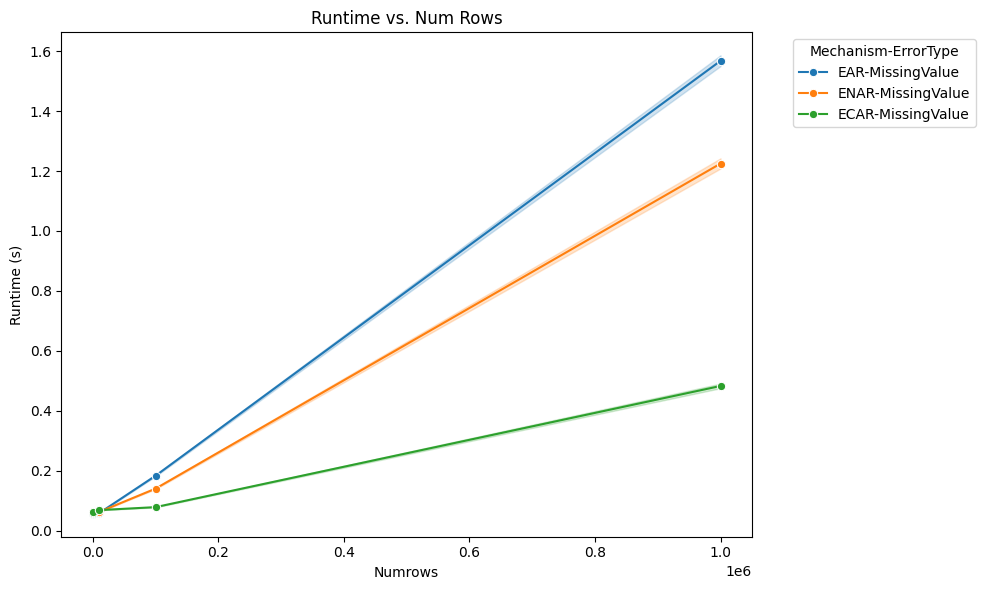

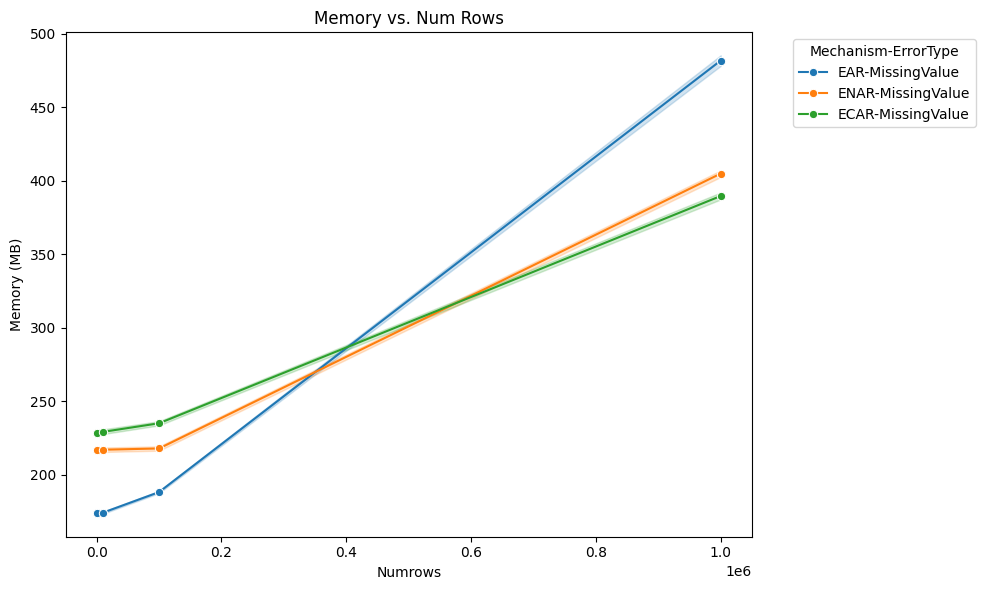

In [14]:
# Num Rows
plot_2D(long_df, error_types=["MissingValue"])  # Runtime
plot_2D(long_df, metric_filter="mem_MB", error_types=["MissingValue"])  # Memory


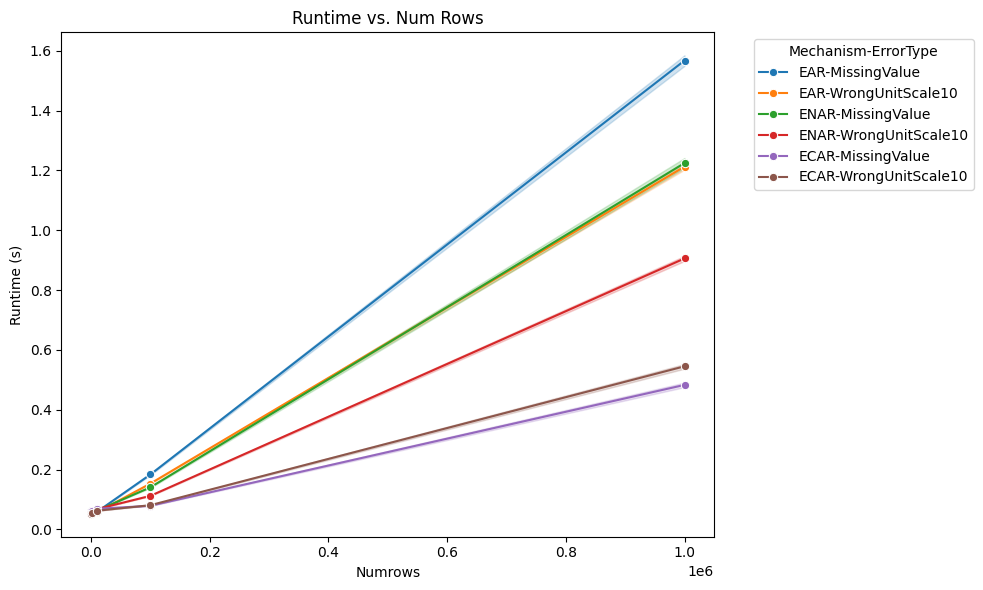

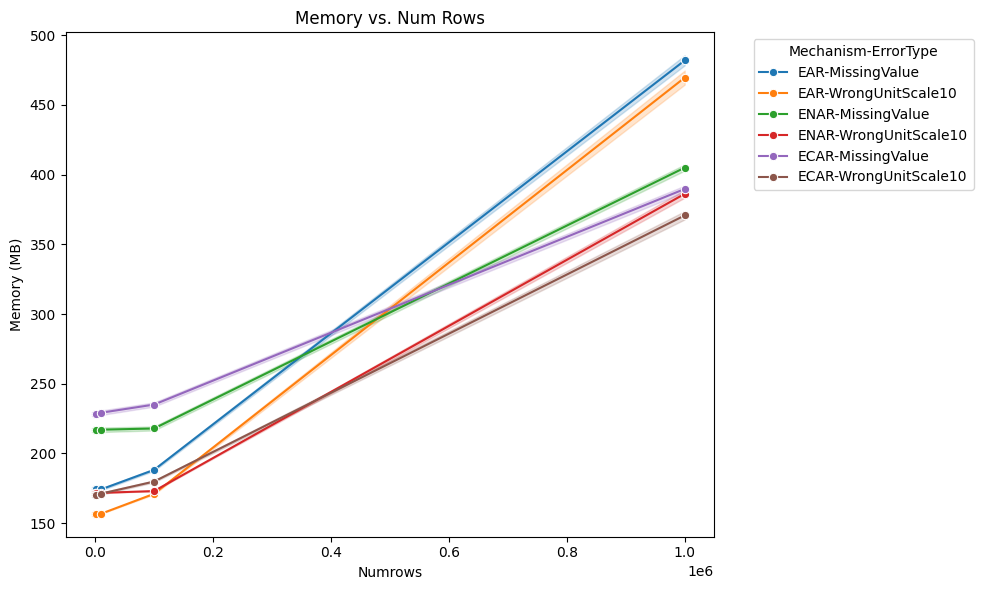

In [37]:
plot_2D(long_df)  # Runtime
plot_2D(long_df, metric_filter="mem_MB")  # Memory
